In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
import tensorflow as tf
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()
from tensorflow.compat.v1 import Session

In [4]:
x_data = np.linspace(0.0,10.0,1000000)

In [5]:
noise = np.random.randn(len(x_data))

In [7]:
noise

array([ 0.42459868,  0.04764622, -0.12266861, ...,  0.03840585,
        1.23595528, -0.04530322])

y = mx+b

b = 5

In [9]:
y_true = (0.5*x_data) + 5 + noise

In [10]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [11]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [13]:
y_df.head()

,Y
0,5.424599
1,5.047651
2,4.877341
3,3.483910
4,3.937477


In [14]:
my_data = pd.concat([x_df,y_df],axis=1)

In [15]:
my_data.head()

,X Data,Y
0,0.00000,5.424599
1,0.00001,5.047651
2,0.00002,4.877341
3,0.00003,3.483910
4,0.00004,3.937477


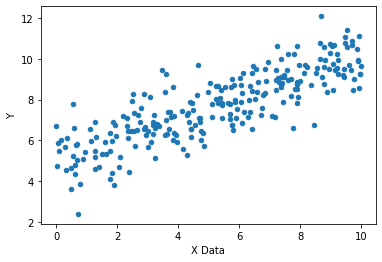

In [17]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y= 'Y')

In [18]:
batch_size = 8

In [19]:
np.random.rand(2)

array([0.20362037, 0.30374989])

In [31]:
m = tf.Variable(0.20)
b = tf.Variable(0.30)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [32]:
xph = tf.compat.v1.placeholder(tf.float32,[batch_size])

In [33]:
yph = tf.compat.v1.placeholder(tf.float32,[batch_size])

In [34]:
y_model = m*xph + b

In [35]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [38]:
optimzer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimzer.minimize(error)

In [40]:
init = tf.compat.v1.global_variables_initializer()

In [47]:
sess = Session()

sess.run(init)

batches = 10000

for i in range(batches):
    
    rand_ind = np.random.randint(len(x_data),size=batch_size)
    
    feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
    
    sess.run(train,feed_dict = feed)
    
model_m , model_b = sess.run([m,b])

In [48]:
model_m

0.45306274

In [49]:
model_b

4.9508147

In [50]:
y_hat = x_data*model_m+model_b

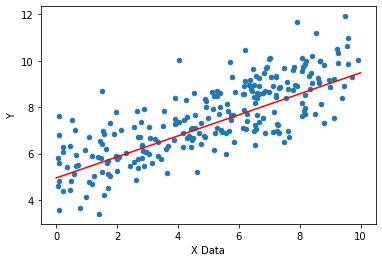

In [51]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

# TF REGRESSION EXAMPLE WITH TF ESTIMATOR API

In [52]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [53]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Public\\Documents\\Wondershare\\CreatorTemp\\tmpqkmt_tth', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [54]:
from sklearn.model_selection import train_test_split


In [55]:
x_train,x_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [56]:
print(x_train.shape)

(700000,)


In [57]:
x_eval.shape

(300000,)

In [59]:
input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [60]:
train_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [61]:
eval_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)

In [62]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead

In [63]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-16T12:36:05Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Public\Documents\Wondershare\CreatorTemp\tmpqkmt_tth\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evalu

In [64]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-16T12:38:21Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Public\Documents\Wondershare\CreatorTemp\tmpqkmt_tth\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evalu

In [65]:
print('TRAINING DATA METRICS:')
print(train_metrics)

TRAINING DATA METRICS:
{'average_loss': 1.0623065, 'label/mean': 7.495742, 'loss': 1.0623065, 'prediction/mean': 7.3954716, 'global_step': 1000}


In [66]:
print('EVAL METRICS:')
print(eval_metrics)

EVAL METRICS:
{'average_loss': 1.07028, 'label/mean': 7.4911118, 'loss': 1.07028, 'prediction/mean': 7.3743086, 'global_step': 1000}


In [67]:
brand_new_data = np.linspace(0,10,10)

In [69]:
input_fn_predict = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [71]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Public\Documents\Wondershare\CreatorTemp\tmpqkmt_tth\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.466375], dtype=float32)},
 {'predictions': array([5.116991], dtype=float32)},
 {'predictions': array([5.767607], dtype=float32)},
 {'predictions': array([6.4182234], dtype=float32)},
 {'predictions': array([7.0688396], dtype=float32)},
 {'predictions': array([7.7194557], dtype=float32)},
 {'predictions': array([8.370071], dtype=float32)},
 {'predictions': array([9.020688], dtype=float32)},
 {'predictions': array([9.671305], dtype=float32)},
 {'predictions': array([10.32192], dtype=float32)}]

In [72]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Public\Documents\Wondershare\CreatorTemp\tmpqkmt_tth\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [73]:
predictions

[array([4.466375], dtype=float32),
 array([5.116991], dtype=float32),
 array([5.767607], dtype=float32),
 array([6.4182234], dtype=float32),
 array([7.0688396], dtype=float32),
 array([7.7194557], dtype=float32),
 array([8.370071], dtype=float32),
 array([9.020688], dtype=float32),
 array([9.671305], dtype=float32),
 array([10.32192], dtype=float32)]

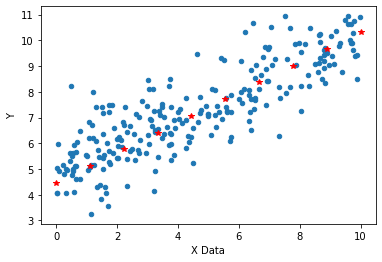

In [76]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r*')